
# Project: Investigate a Dataset - No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The No Show dataset was us used for analysis. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The dataset majors on the chances of patients showing up for an appointment given the many features that may affect it. Below are the attributes featured

* PatientId - Unique Identifying number for patients. 
* AppointmentID- Unique Identifacation number for appointment booked. 
* Gender -Patient Gender 
* ScheduledDay - Day when appointmentday was scheduled 
* AppointmentDay - The actual day to visit the hospital 
* Age - how old the patient is Neighbourhood - place where the appointment does take place 
* Scholarship - 
* Hipertension - whether the patient has hypertension or not, 
* True or False Diabetes - whether a patient is diabetic or not, True or False 
* Alcoholism - whether the patient is an alcoholic or not, True or False 
* Handcap- whether the patient is handicap or not, True or False 
* SMS_received - no of messages sent to the patient 
* No-show - Whether a patient showed for their appointment (No: showed up, Yes: didn't show up)

### Question(s) for Analysis

The analysis will seek to answer the following: 
* Which gender is likely to show up for their appointment.
* How do other features in the dataset affect the show up rate.
* What is the frequency of sending SMS to patients for their appointments?


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, data will be loaded using csv_read in preparation for analysis

#### Importing libraries

In [1]:
# Import all the packages needed for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# to help Print visualizations
%matplotlib inline

### Loading data

In [2]:
#loading dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#print the first few rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Checking for data types

In [3]:
# check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> From the output above, it is evident that there are no null values

### Checking for duplicates, unique and null values

In [4]:
#check for duplicates in the dataset
sum(df.duplicated())

0

In [5]:
#checking for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the above, there exists no missing values or duplicates.

In [6]:
#checking for unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#narrowing down to unique values in gender
(df.Gender.unique())

array(['F', 'M'], dtype=object)

In [8]:
#checking unique values for age
(df.Age.unique())

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

> From the above, it can be underscored that there exists outlier ages

In [9]:
#check for patients over 100 years of age
above_100 = df.query('Age >= 100')

#check how many patients are below 0 years of age
under_zero = df.query('Age < 0')

> As seen above, our dataset does not have both null values and duplicates in the 110527 rows. The patient's age ranges from -1 to 115 being the oldest. Ages -1 and those above 100 will be dropped as outliers inthe data cleaing section


### Data Cleaning

In this section, inconsistent column labels will be rectified and outlier values in the Age column dropped while dropping columns that will not affet the analysis

### Dropping Irrelevant columns

> The code below will drop columns PatientId, AppointmentID, ScheduledDay, AppointmentDay, Neighbourhood

In [10]:
#drop column names that are redundant
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'],axis=1,inplace=True)

In [11]:
#check for changes
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


### Rename columns

Some of the columns above are misspelt.For instance hipertension which the correct wording is hypertension and handcap.In this section we are going to change the spelling mistakes.

In [12]:
#correcting name columns
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap'},inplace=True)
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


## Exploratory Data Analysis
The varous parameters of the dataset are explored to determine their effect on no-shows.

### Research Question 1 -  Which gender is more likely to show up for appointment?

> The section below will examine various aspectsof gender of patients and relate to no-shows

#### Total count of shows and no-shows for the population

In [13]:
#check distribution of appointments
Noshow = df['No-show'].value_counts()
Noshow

No     88208
Yes    22319
Name: No-show, dtype: int64

##### Plot a bar chart of no-show and shows for the population

In [14]:
def bar_plot_func(x, h, xlabel, ylabel, title):
    plt.bar(x, h, width=0.4, align='center')
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    

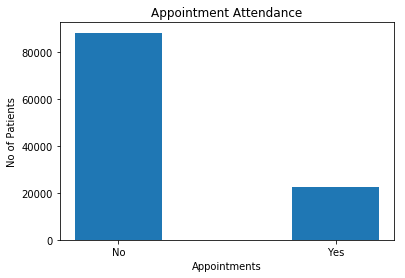

In [15]:
#plot a bar chart using the function created for No-show counts
bar_plot_func(Noshow.index, Noshow, "Appointments", "No of Patients", "Appointment Attendance")

> From the above, it can be inferred that 80% of the patients came for their appointments

#### Display the counts per gender for the dataset

In [16]:
#checking the gender count groupby function
df_Gender = df.groupby('Gender').Gender.count()
df_Gender

Gender
F    71840
M    38687
Name: Gender, dtype: int64

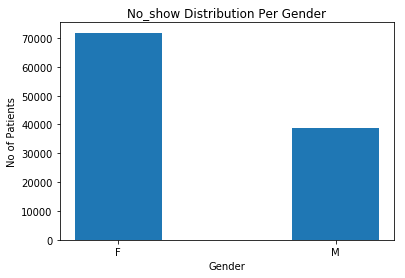

In [17]:
#visual for gender distribution for the dataset
bar_plot_func(df_Gender.index, df_Gender, "Gender", "No of Patients", "No_show Distribution Per Gender")

> From the output, it is evident that more females book for doctor appointments than males

#### Determine the no-show count per gender

In [18]:
# calculate noshow counts by gender
gender_count = df.groupby(['Gender', 'No-show']).count()['Age']
gender_count

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: Age, dtype: int64

> The code below will plot a bar chart for the counts of shows and no shws per gender

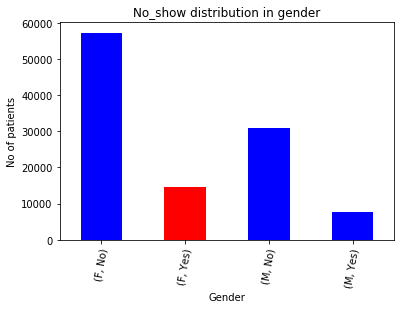

In [19]:
# plot a bar chart for shows and no shows
df_Gender = df.groupby(['Gender', 'No-show']).count()['Age']
df_Gender.plot.bar(x="Gender", y="count", rot=80, title="No_show distribution in gender", color=('blue', 'red'))
plt.xlabel('Gender')
plt.ylabel('No of patients'); 

> From the resulting graphs, it can be underscored that more women ket their appointments

### Research Question 2:  Does the age of the patient affect the no-show

> In ths section, the age of the atents is explored against the show/no-show rate

##### Defining parameters and plotting a histogram for no-shows

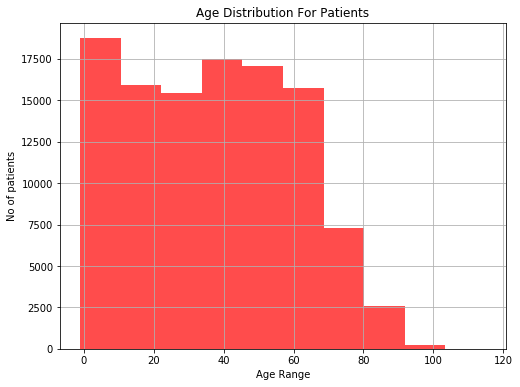

In [20]:
# properties for the age histogram
df['Age'].hist(figsize=(8,6), color ='red', alpha = 0.7)
plt.title('Age Distribution For Patients')
plt.xlabel('Age Range')
plt.ylabel('No of patients')
plt.show() 

>  From the graph above, the ages between 20 - 60 years are more likely to visit the hospital more often than the rest

### Research Question 3: What is the frequency of sending SMS to patients for their appointments? 

> The code below will illustrate the number of patients that received SMS vs those that didn't

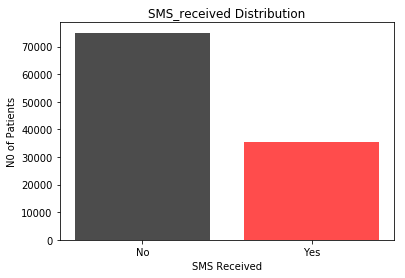

In [21]:
#draw a visual for SMS_received
no = sum(df['SMS_received'] == 0)
yes = sum(df['SMS_received'] == 1)
colors = ['black', 'red']
locations = [1,2]
heights = [no, yes]
labels = ['No', 'Yes']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.7)
plt.title('SMS_received Distribution')
plt.xlabel('SMS Received')
plt.ylabel('N0 of Patients');

> From the above graph, the percentage of people who received one ormore than 1 text was lesser compared  the majority who
didnt receive any.

From the above illustrations, Our sample is made up of 65 percent females and 35 percent males in terms of gender.Only 20 percent of patients failed to show up for their appointments, indicating a positive trend. With the remaining 80% showing up pn the day of their appointment. We get figures of 32 percent of patients received an SMS message reminding them of their appointment. People of ages 20 t0 60 are more likely to visit the hospital as shown above. 

<a id='conclusions'></a>
## Conclusions


From the above analysis, it can be concluded as follows:
* Women are more likely to visit the hospital than men as they made up a bigger percentage of the population that visits 
the hospital.
* People are likely to go to the hospital on the appointment day as seen above. 80% patients of the patients showed up with
no further prompts.
* The rest of the features have an overall effect on the show up rate of different patients but its hard for
   but its not really clear to us if analyzed one by one. It's therefore hard to know which feature affects the show up rate
   more than the rest.
   

<a id='conclusions'></a>
## Limitations

* Existence of abnormal values such as -1 and 115 in the age column

# References

https://www.kaggle.com/joniarroba/noshowappointments.
https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/ 
https://www.kaggle.com/code/yousuf28/medical-appointment-no-show-in-python/notebook

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])